# Chapter 4 NumPy Basics
## The NumPy ndarray: 
### The basics:
An ndarray is a generic multidimensional container for homogeneous data; all elements must be the same type, indexed by a tuple of positive integers. In NumPy dimensions are called _axes_.
Every array has
 * __ndarray.ndim__: the number of axes (dimensions) of the array
 * __ndarray.shape__: a tuple indicating the size of each dimension. For a matrix with _n_ rows and _m_ columns, __shape__ will be _(n, m)_. The length of the __shape__ tuple is therefore the number of axes, __ndim__.
 * __ndarray.dtype__: an object describing the _data type_ of the array, NumPy provides types of its own. numpy.int32, numpy.int16, numpy.int64 are some examples.

In [1]:
import numpy as np
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [2]:
data.ndim

2

In [3]:
data.shape

(3, 5)

In [4]:
data.dtype.name

'int64'

 * __ndarray.size__: the total number of elements of the array. This is equal to the product of the elements of __ndarray.shape__
 * __ndarray.itemsize__: the size in __bytes__ of each element of the array. It is equivalent to __ndarray.dtype.itemsize__.
 * __ndarray.data__: the buffer containing the actual elements of the array. Normally, we won't need to use this.

In [5]:
data.itemsize

8

In [6]:
type(data)

numpy.ndarray

### Creating ndarrays
1. The easiest way: use the __array__ function: accepts any sequence-like object and produces a new NumPy array containing the passed data. For example, a list/tuple is a good candidate for conversion:

In [7]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of __equal-length__ lists, will be converted into a multidimensional array:

In [8]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

A frequent error consists in calling __array__ with multiple numeric arguments, rather than providing a single list of numbers as an argument:

In [9]:
a = np.array(1, 2, 3, 4)    #WRONG
a = np.arrar([1, 2, 3, 4])    #RIGHT

ValueError: only 2 non-keyword arguments accepted

The type of the array can also be explicitly specified at creation time:

In [10]:
c = np.array([[1, 2], [3, 4]], dtype=complex)
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

2. There are a number of other functions for creating new arrays. As examples:
 * __zeros__ and __ones__ create arrays of 0s and 1s, respectively, with a given length or shape

In [11]:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

 * __empty__ creates an array without initializing its values to any particular value. 

In [12]:
np.empty((2, 4, 3))    # 第三维在前
# Uninitialized, output may vary. It's not safe to assume that np.empty will return an array of all zeors,
# sometimes it will be garbages.

array([[[ 9.38724727e-323,  0.00000000e+000,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000]],

       [[-1.28822975e-231, -1.28822975e-231,  2.68678637e+154],
        [-1.28822975e-231,  5.43472210e-323,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000]]])

 * __arange__ analogous to __range__ that returns arrays of sequences of numbers.

In [13]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

In [18]:
np.arange(10, 20, 1.5)    # it accepts float arguments

array([10. , 11.5, 13. , 14.5, 16. , 17.5, 19. ])

When __arange__ is used with floating point arguments, it is generally not possible to predict the number of elements obtained, due to the finite floating point precision. For this reason, it is usually better to use the function __linspace__ that receives as an argument the number of elements that we want, instead of the step:

In [19]:
np.linspace(0, 10, 9)    # 9 numbers from 0 to 10, both ends are inclusive

array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ])

Array Creation Functions

Function | Description
----------- | ---------------
array | Convert input data(list, tuple, array, other sequence type) to an ndarray (explicitly specifying a dtype); copies the input data by default
asarray | Convert input to ndarray, but do not copy if the input is already an ndarray
arange | Like the built-in range but returns an ndarray instead of a list
ones | Produce an array of all 1s with the given shape and dtype 
ones_like | Produces a ones array of the same shape and dtype
zeros, zeros_like | Like ones and ones_like but producing arrays of 0s instead
empty, empty_like | Create new arrays y allocating new memory, but do not populate with any values like ones and zeros
full, full_like | Produce an array of the given shape and dtype with all values set to the indicated 'fill value'
eye, identity | Create a Square N x N identity matrix (1s on the diagonal and 0s elsewhere)

### Data Types for ndarrays
__dtype__ is a special object containing the information the ndarray needs to interpret a chunk of memory as a particular type of data, it is named in this way: a type name, like float or int, followed by a number indicating the number of bits per element:

In [20]:
arr1 = np.array([1,2,3], dtype=np.float64)
arr2= np.array([4,5,6], dtype=np.int32)
arr1.dtype

dtype('float64')

In [21]:
arr1.dtype.itemsize

8

In [22]:
arr2.dtype

dtype('int32')

In [23]:
arr2.dtype.itemsize

4

NumPy Data Types
Type | Type Code | Description
----- | ----- | -----
int8, uint8 | i1, u1 | Signed and unsigned 8-bit integer types
int16, uint16 | i2, u2 | Signed and unsigned 16-bit ineger types
int32, uint32 | i4, u4 | Signed and unsigned 32-bit integer types
int64, uint64 | i8, u8 | Signed and unsigned 64-bit integer types
float16 | f2 | Half-precision floating point
float32 | f4 or f | Standard single-precision floating point; compatible with C float
float64 | f8 or d | Standard double-precision floating point; compatible with C double and Python float object
float128 | f16 or g | Extended-precision floating point
complex64, complex128, complex256 | c8, c16, c32 | Complex numbers represented by two 32, 64, or 128 floats, respectively
bool | ? | Boolean type storing True and False values
object | 0 | Python object type; a value can be any Python object
string_ | S | Fixed-length ASCII string type (1 byte per character); for example, to create a string dtype with length 10, use 'S10'
unicode_ | U | Fixed-length Unicode type (number of bytes platform specific); same specification semantics as string_ (e.g., 'U10')

Explicitly convert or cast an array from one dtype to another using ndarray's __astype__ method:

In [24]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [25]:
float_arr = arr.astype(np.float64)    # 使用astype时，ndarray被复制，所以不能更改原ndarray的dtype；
float_arr.dtype

dtype('float64')

If I cast some floating-point numbers to be of integer dtype, the decimal part will be truncated:

In [26]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [27]:
arr1 = arr.astype(np.int64)    # 使用astype时，ndarray被复制，所以不能更改原ndarray的dtype；
arr1.dtype

dtype('int64')

In [28]:
arr.dtype

dtype('float64')

An array of strings representing numbers, you can use __astype__ to convert them to numeric form:

In [29]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
converted_numeric_strings = numeric_strings.astype(np.float32)
converted_numeric_strings

array([ 1.25, -9.6 , 42.  ], dtype=float32)

Type Code can also be used to refer to a dtype:

In [30]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1072693248,          0, 1073741824,          0,
       1074266112,          0, 1074790400], dtype=uint32)

__Calling astype always creates a new array (a copy of the data), even if the new dtype is the same as the old dtype.__

### Arithmetic with NumPy Arrays
Arrays enable you to express batch operations on data without writing any for loops. This is called _vectorization_. Any arithmetic operations between equal-size arrays applies the operation element-wise:

In [31]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [33]:
arr - arr

array([[0, 0, 0],
       [0, 0, 0]])

Arithmetic operations with scalars propagate the scalar argument to each element in the array:

In [34]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [35]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Comparisons between arrays of the same size yield boolean arrays:

In [36]:
arr2 = np.array([[0, 4, 1], [7, 2, 12]])

In [37]:
arr2

array([[ 0,  4,  1],
       [ 7,  2, 12]])

In [38]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

Operations between differently sized arrays is called __broadcasting__. 此处下面会介绍。

### Basic Indexing and Slicing
One dimensional arrays are simple; similar to Python lists:

In [39]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
arr[5]

5

In [41]:
arr[5:8]

array([5, 6, 7])

In [42]:
arr[5:8] = 12   #assign a scalar to a  slice
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

As we can see from the above example, if assigning a scalar value to a slice, as in arr[5:8] = 12, the value is _boradcasted_ to the entire selection. 

An important first distinction from Python's built-in lists is that array slices are _views_ on the original array. This means that the data is __not copied__, and any modifications to the view will be reflected in the source array:

In [43]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [44]:
arr_slice[1] = 12345
arr    # 修改arr_slice的值，arr跟着一块变

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The "bare" slice [:] will assign to all values in an array:

In [45]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you want a copy of an ndarray instead of a view, you will need to do it explicitly using copy() method:

In [46]:
arr_copied = arr[5:8].copy()

In a two-dimensional array, the elements at each index is an one-dimensional arrays:

In [47]:
arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr2d[2]

array([7, 8, 9])

Thus, individual elements can be accessed recursively. These are equivalent:

In [48]:
arr2d[0][2]

3

In [49]:
arr2d[0,2]

3

It is helpful to think of axis 0 as the "rows" of the array and axis 1 as the "columns", FOR A TWO-DIMENSIONAL NDARRAY.

In multidimensional arrays, if later indices is omitted, the returned object will be a lower dimensional ndarray consisting of all the data along the higher dimensions. So in the following 2x2x3 array arr3d:

In [50]:
arr3d = np.arange(12).reshape(2,2,3)
arr3d

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

arr3d[0] is a 2x3 array:

In [51]:
arr3d[0]    # later indices omitted

array([[0, 1, 2],
       [3, 4, 5]])

Both scalar values and arrays can be assigned to arr3d[0]:

In [52]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d[0]

array([[42, 42, 42],
       [42, 42, 42]])

In [53]:
arr3d[0] = old_values
arr3d

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

Similarly, arr3d[1, 0] gives you all of the values whose indices start with (1, 0), forming a 1-dimensional array:

In [54]:
arr3d[1, 0]

array([6, 7, 8])

In [55]:
arr3d[1][0] 

array([6, 7, 8])

### Indexing with slices
One-dimensional ndarrays can be sliced with the syntax similar to Python 1-d lists:

In [56]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [57]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

Slicing two-dimensional array is a bit different:

In [58]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

The selection is on the axis 0, by default:

In [59]:
arr2d[:2]  

array([[1, 2, 3],
       [4, 5, 6]])

Select multiple axis by seperate the slicing with a colon:

In [60]:
arr2d[0,:]

array([1, 2, 3])

### Boolean Indexing
Consider some data in an array called _data_, and an array of names corresponding with data _names_(the name and data at the same location in both arrays are a pair). 

In [61]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [62]:
data

array([[ 0.41291606,  0.57965723,  0.57665924,  2.24042604],
       [-0.24297769, -0.66211257, -1.58088093, -0.74437939],
       [ 0.64873815,  0.44864755,  1.0667685 , -0.8774218 ],
       [-1.89190194, -1.39288367, -0.94159145, -0.24718018],
       [-1.10590086, -0.77242479,  1.00039919,  0.67631333],
       [ 0.86574329,  0.61649918, -0.45407095, -1.39990797],
       [-0.30587764,  0.67407645,  1.1862419 ,  0.94361432]])

Each name corresponds to a row in the data array, if we want to select the data corresponding to a specific name, 'Bob', Like arithmetic operations, comparisons with arrays are also vectorized, comparing ndarray with a string yields a boolean array:

In [63]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

This boolean array can be passed to the _data_ array as indices:

In [64]:
data[names == 'Bob']

array([[ 0.41291606,  0.57965723,  0.57665924,  2.24042604],
       [-1.89190194, -1.39288367, -0.94159145, -0.24718018]])

__The boolean array must be of the same length as the array axis it's indexing. You can even mix and match boolean arrays with slices or integers (or sequences of integers). Boolean selection will not fail if the boolean array is NOT the correct length!!!__

We can select the rows by names and columns by integer slicing:

In [65]:
data[names == 'Bob', 2:]

array([[ 0.57665924,  2.24042604],
       [-0.94159145, -0.24718018]])

In [66]:
data[names == 'Bob', 3]

array([ 2.24042604, -0.24718018])

To select everything but 'Bob', you can either use != or negate the condition using ~:

In [67]:
data[names != 'Bob']

array([[-0.24297769, -0.66211257, -1.58088093, -0.74437939],
       [ 0.64873815,  0.44864755,  1.0667685 , -0.8774218 ],
       [-1.10590086, -0.77242479,  1.00039919,  0.67631333],
       [ 0.86574329,  0.61649918, -0.45407095, -1.39990797],
       [-0.30587764,  0.67407645,  1.1862419 ,  0.94361432]])

In [68]:
data[~(names == 'Bob')]

array([[-0.24297769, -0.66211257, -1.58088093, -0.74437939],
       [ 0.64873815,  0.44864755,  1.0667685 , -0.8774218 ],
       [-1.10590086, -0.77242479,  1.00039919,  0.67631333],
       [ 0.86574329,  0.61649918, -0.45407095, -1.39990797],
       [-0.30587764,  0.67407645,  1.1862419 ,  0.94361432]])

The ~ operator can be useful when you want to invert a general condition:

In [69]:
cond = names == 'Bob'
data[~cond]

array([[-0.24297769, -0.66211257, -1.58088093, -0.74437939],
       [ 0.64873815,  0.44864755,  1.0667685 , -0.8774218 ],
       [-1.10590086, -0.77242479,  1.00039919,  0.67631333],
       [ 0.86574329,  0.61649918, -0.45407095, -1.39990797],
       [-0.30587764,  0.67407645,  1.1862419 ,  0.94361432]])

Select multiple names to combine the boolean conditions, use boolean arithmetic operators &(and) and |(or):

The Python keywords _and_ and _or_ do not work with boolean arrays. Use & and | only.

In [70]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [71]:
data[mask]

array([[ 0.41291606,  0.57965723,  0.57665924,  2.24042604],
       [ 0.64873815,  0.44864755,  1.0667685 , -0.8774218 ],
       [-1.89190194, -1.39288367, -0.94159145, -0.24718018],
       [-1.10590086, -0.77242479,  1.00039919,  0.67631333]])

To set all of the negative values in data to 0:

In [72]:
data[data < 0] = 0
data

array([[0.41291606, 0.57965723, 0.57665924, 2.24042604],
       [0.        , 0.        , 0.        , 0.        ],
       [0.64873815, 0.44864755, 1.0667685 , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.00039919, 0.67631333],
       [0.86574329, 0.61649918, 0.        , 0.        ],
       [0.        , 0.67407645, 1.1862419 , 0.94361432]])

__Selecting data from an array by boolean indexing always creates a copy of the data, even if the returned array is unchanged.__

### Fancy Indexing
This is a term adopted by NumPy to describe indexing using integer arrays. Suppose we had an 8 x 4 array:

In [73]:
arr = np.empty((8,3))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0.],
       [1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.],
       [5., 5., 5.],
       [6., 6., 6.],
       [7., 7., 7.]])

To select out a subset of the rows in a particular order, you can pass a list or ndarray of integers specifying the desired order, using negative indices selects rows from the end:

In [74]:
arr[[7,5,4,6,1,3,3,-1,-1]]

array([[7., 7., 7.],
       [5., 5., 5.],
       [4., 4., 4.],
       [6., 6., 6.],
       [1., 1., 1.],
       [3., 3., 3.],
       [3., 3., 3.],
       [7., 7., 7.],
       [7., 7., 7.]])

Passing multiple index arrays is slightly different; it selects a one-dimensional array of elements corresponding to each tuple of indices:

In [75]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [76]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Here the (1, 0), (5, 3), (7, 1), and (2, 2) elements were selected. Regardless of how many dimensions the array has, the result of fancy indexing is always one-dimensional.

### Transposing Arrays and Swapping Axes
Transposing is a special form of reshaping that returns a view without copying anything. Arrays have the _transpose_ method and also the special __T__ attribute:

In [77]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [78]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

This is useful when computing the inner matrix product using _np.dot_:

In [79]:
dot_product = np.dot(arr, arr.T)
dot_product

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

For higher dimensional arrays, __transpose__ will accept a tuple of axis numbers to permute the axes:

In [80]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [81]:
arr.transpose((1, 0, 2))   #原来的第1轴变为新的0轴，原0轴变1轴，原2轴变2轴。略抽象。

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [82]:
arr.transpose((1, 2, 0))

array([[[ 0,  8],
        [ 1,  9],
        [ 2, 10],
        [ 3, 11]],

       [[ 4, 12],
        [ 5, 13],
        [ 6, 14],
        [ 7, 15]]])

Simple transposing with _.T_ is a special case of swapping axes. ndarray has the method swapaxes, which takes a pair of axis numbers and switches the indicated axes to rearange the data:

In [83]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

_swapaxes_ similarly returns a view without making a copy.

## Universal Functions: Fast Element-Wise Array Functions
a universal function, or _ufunc_, is a function that performs element-wise operations on data in ndarrays：

In [84]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [85]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [86]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as unary ufuncs (一元的)。 Others, such as __add__ or __maximum__, take two arrays (thus, binary ufuncs) and return a single array as the result:

In [87]:
x = np.random.randn(8)
y = np.random.randn(8)
x

array([ 1.22629231, -0.60029186, -0.71183273, -1.06895881,  0.18547416,
        0.66165412,  0.39397063,  1.05099183])

In [88]:
y

array([ 0.53153581,  0.55180162, -0.16164051, -1.83549369, -1.26125199,
       -0.30675877,  0.37802411,  0.57169823])

In [89]:
np.maximum(x, y)

array([ 1.22629231,  0.55180162, -0.16164051, -1.06895881,  0.18547416,
        0.66165412,  0.39397063,  1.05099183])

_np.maximum_ computed the element-wise of the elements in x and y.

While not common, a ufunc can return multiple arrays. __modf__ is one example, a vectorized version of the built-in Python __divmod__; it returns the fractional and integral parts of a floating-point array:

In [90]:
arr = np.random.randn(7) * 5
arr

array([-5.88508895,  9.2334937 , -4.46652835,  2.10810297, -2.13990284,
       -1.60235072,  1.90496104])

In [91]:
remainder, whole_part = np.modf(arr)
remainder

array([-0.88508895,  0.2334937 , -0.46652835,  0.10810297, -0.13990284,
       -0.60235072,  0.90496104])

In [92]:
whole_part

array([-5.,  9., -4.,  2., -2., -1.,  1.])

ufuncs accept an optional out argument that allows them to operate in-place on arrays (意思是可以把结果输出到指定位置？？？):

In [93]:
arr

array([-5.88508895,  9.2334937 , -4.46652835,  2.10810297, -2.13990284,
       -1.60235072,  1.90496104])

In [94]:
np.sqrt(arr)

/Users/jianbinliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan, 3.03866644,        nan, 1.45193077,        nan,
              nan, 1.38020326])

In [95]:
np.sqrt(arr, arr)

/Users/jianbinliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan, 3.03866644,        nan, 1.45193077,        nan,
              nan, 1.38020326])

In [96]:
arr

array([       nan, 3.03866644,        nan, 1.45193077,        nan,
              nan, 1.38020326])

Unary ufuncs
Function | Description
-------- | ---------------------
abs, fabs | Compute the absolute value element-wise for integer, floating-point, or complex values
sqrt | Compute the square root of each element
square | Compute the square of each element
exp | Compute the exponent of each element
log, log10, log2, log1p | ln, log10, log2, log(1+x)
sign | Compute the sign of each element: 1 (>0), 0 (zero), or -1 (<0) 
ceil | Compute the ceil of each element (i.e. the smallest integer greater than or equal to that number)
floor | Compute the floor of each element (the largest integer less than or equal to each element)
rint | Round elements to the nearest integer, preserving the dtype
modf | Return fractional and integral parts of array as a separate array
isnan | Return boolean array indicating whether each value is NaN
isfinite, isinf | Return boolean array indicating whether each element is finite or infinite, repectively
cos, cosh, sin, sinh, tan, tanh | 
arccos, arccosh, arcsin, arcsinh, arctan, arctanh |
logical_not | Compute truth value of not x element-wise (equivalent to ~arr)

Binary Universal Functions
Function | Description
-------- | ------------------
add | Add corresponding elements in arrays
subtract | Subtract elements in second array from first array
multiply | Multiply array elements
divide, floor_divide | Divide or floor divide (truncating the remainder)
power | Raise elements in first array to powers indicated in second array
maximum, fmax | Element-wise maximum; _fmax_ ignores NaN
minimum, fmin | Element-wise minimum; _fmin_ ignores NaN
mod | Element-wise modulus (remainder of division)
copysign | Copy sign of values in second argument to values in first argument
greater, greater_equal, less, less_equal, equal, not_equal | Perform element-wise comparison, yielding boolean array (equivalent to infix operators >, >=, <, <=, ==, !=)
logical_and, logical_or, logical_xor | Compute element-wise truth value of logical operation (equivalent to infix oeprators & \| ^)

## Array-oriented Programming with Arrays
NumPy enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops. This practice of replacing explicit loops with array expressions is commonly referred to as _vectorization_. 

As a simple example, we wished to evaluate the function sqrt(x^2 + y^2) across a regular grid of values. The _np.meshgrid_ function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [97]:
points = np.arange(-5, 5, 0.01)    # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)    # 生成笛卡尔坐标系 x y轴上的点；x轴正方向 向右，y轴正方向 向下。坐标点数量为len(points) X len(points)
# xs为x轴的坐标矩阵，ys为y轴的坐标矩阵。
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [98]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

Now evaluating the function is a matter of writing the smae expression you would write with two points:

In [99]:
z = np.sqrt(xs **2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

use matplotlib to create visualizations of this two-dimensional array:

In [100]:
import matplotlib.pyplot as plt
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

### Expressing Conditional Logic as Array Operations
The _numpy.where_ function is a vectorized version of the ternary expression: x if condition else y. Suppose we had a boolean array and two arrays of values:

In [101]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from __xarr__ whenever the corresponding value in __cond__ is __True__, and otherwise take the value from yarr:

In [102]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

The above codes have multiple problems. 1st, it will be very slow for large arrays. 2nd, it will not work will multidimensional arrays. With _np.where_ you can write this very concisely:

In [103]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to _np.where_ don't need to be arrays; one or both of them can be scalars.

A typical use of _where_ in data analysis is to produce a new array of values based on another array. Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with -2. This is very easy to do with _np.where_:

In [104]:
arr = np.random.randn(4, 4)
arr

array([[ 1.97600252,  0.88252074,  1.70137254,  0.81400995],
       [ 0.29490678, -0.42616228, -0.09614593,  1.17171856],
       [-0.18826103, -0.98964565,  0.84636333,  0.10868488],
       [-0.87305417,  0.3538559 ,  1.9836263 ,  1.18585361]])

In [105]:
arr > 0

array([[ True,  True,  True,  True],
       [ True, False, False,  True],
       [False, False,  True,  True],
       [False,  True,  True,  True]])

In [106]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2,  2],
       [ 2, -2, -2,  2],
       [-2, -2,  2,  2],
       [-2,  2,  2,  2]])

Or combine scalars and arrays together:

In [107]:
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        ,  2.        ,  2.        ],
       [ 2.        , -0.42616228, -0.09614593,  2.        ],
       [-0.18826103, -0.98964565,  2.        ,  2.        ],
       [-0.87305417,  2.        ,  2.        ,  2.        ]])

__The arrays passed to np.where can be more than just equal-sized arrays or scalars__

### Mathematical and Statistical Methods
A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as __mehtods__ of the array class. You can use aggregations like _sum_, _mean_, and _std_ (standard deviation) either by calling the array instance method or using the top-level NumPy function:

In [108]:
arr = np.random.randn(5, 4)
arr

array([[-1.22937338,  0.38655705,  0.8331261 , -0.41840205],
       [ 0.41421795, -1.10319251, -1.38449413, -0.15756464],
       [ 0.77511506, -0.00718616, -0.74573286, -0.50659159],
       [-1.15017872,  1.13866012, -0.5500804 , -1.05178677],
       [ 0.16642228, -0.28807357, -0.18633956,  0.40463517]])

In [109]:
arr.mean()

-0.2330131307675764

In [110]:
np.mean(arr)

-0.2330131307675764

In [111]:
arr.sum()

-4.660262615351528

Functions like _mean_ and _sum_ take an optional _axis_ argument that computes the statistic over the given axis, resulting in an array with one fewer dimension:

arr.mean(1) means: Compute mean across the columns

In [112]:
arr.mean(axis=1)    # calculate mean in a row

array([-0.10702307, -0.55775833, -0.12109889, -0.40334644,  0.02416108])

In [113]:
arr.mean(axis=0)

array([-0.20475936,  0.02535298, -0.40670417, -0.34594198])

Other methods like _cumsum_ and _cumprod_ do not aggregate, instead producing an array of the intermediate results:

cumsum: arry_cumsum[n] == sum(array[:n+1])
cumprod: (product) arry_cumprod[n] == product(array[:n+1])

In [114]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions like _cumsum_ return an array of the same size, but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [115]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [116]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [117]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

In [118]:
arr.cumprod(axis=0)

array([[ 0,  1,  2],
       [ 0,  4, 10],
       [ 0, 28, 80]])

Basic array statistical methods
Method | Description
-------- | --------------
sum | Sum of all the elements in the array or along an axis; zero-length arrays have sum 0
mean | Arithmetic mean; zero-length arrays have NaN mean
std, var | Standard deviation and variance, respectively, with optional degrees of freedom adjustment (default denominator n)
min, max | Minimum and maximum
argmin, argmax | Indices of minimum and maximum elements, respectively
cumsum | Cumulative sum of elements starting from 0
cumprod | Cumulative product of elements starting from 1

### Methods for Boolean Arrays
Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus, sum is often used as a means of counting True values in a boolean array:

In [119]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

44

There are two additional mehtods, _any_ and _all_, useful especially for boolean arrays. _any_ tests whether one or more values in an array is __True__, while __all__ checks if every value is __True__:

In [120]:
bools = np.array([False, False, True, False])
bools.any()

True

In [121]:
bools.all()

False

These methods also work with non-boolean arrays, where non-zero elements evaluate to __True__.

### Sorting
NumPy arrays can be sorted in-place with the sort method just like Python's built-in list type:

In [122]:
arr = np.random.randn(6)
arr

array([ 0.81131615, -0.65796895,  0.85483401,  0.51566598, -0.4857286 ,
       -0.72565256])

In [123]:
arr.sort()
arr

array([-0.72565256, -0.65796895, -0.4857286 ,  0.51566598,  0.81131615,
        0.85483401])

You can sort each one-dimentional section of values in a multidimensional array in-place along an axis by passing the axis number to sort:

In [124]:
arr = np.random.randn(4, 3)
arr

array([[-0.03949665, -1.93498034, -0.63571743],
       [ 0.96883942, -0.30733116, -0.55642776],
       [ 0.97683665, -0.24276684, -0.08273206],
       [ 0.51355641, -0.86420416,  0.84815847]])

In [125]:
arr.sort(1)    # sort items in a row
arr

array([[-1.93498034, -0.63571743, -0.03949665],
       [-0.55642776, -0.30733116,  0.96883942],
       [-0.24276684, -0.08273206,  0.97683665],
       [-0.86420416,  0.51355641,  0.84815847]])

The top level mehtod np.sort returns a sorted copy of an array instead of modifying the array in-place. 

A quick and dirty way to compute the quantiles of an array is to sort it and select the value at a particular rank:

In [126]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.7129525594085149

### Unique and Other Set Logic
Some basic __set__ operations for one-dimensional ndarrays. A commonly used one is np.unique, which returns the sorted unique values in an array:

In [127]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

Contrast np.unique with the pure Python alternative:

In [128]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [129]:
ints = np.array([1, 2, 3, 4, 1, 2, 3, 4, 5, 4, 3, 2, 2, 2,])
np.unique(ints)

array([1, 2, 3, 4, 5])

Array __Set__ operations
Method | Description
--------- | -----------
unique(x) | Compute the sorted, unique elements in x
intersect1d(x, y) | Compute the sorted, common elements in x and y
union1d(x, y) | Compute the sorted union of elements
in1d(x, y) | Compute a boolean array indicating whether each element of x is contained in y
setdiff1d(x, y) | Set difference, elements in x that are not in y
setxor1d(x, y) | Set symmetric differences; elements that are in either of the arrays, but not both

## File Input and Output with Arrays
NumPy is able to save and load data to and from disk either in text or binary format. But most users will prefer pandas and other tools for loading text or tabular data.

Here will discuss the NumPy's built-in binary format:

_np.load_ and _np.save_ are the functions for loading and saving array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension _.npy_:

In [130]:
arr = np.arange(10)
np.save('Some_array', arr)

If the file path does not already end in _.npy_, the extension will be appended. The array on disk can then be loaded with _np.load_:

In [131]:
np.load('Some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You can save multiple arrays in an uncompressed archive using _np.savez_ and apssing the arrays as keyword arguments:

In [132]:
arr = np.arange(10)
arr2 = np.random.randn(10)
np.savez('array_archive.npz', a=arr, b=arr2)

When loading an _.npz_ file, you get back a dict-like object that laods the individual arrays lazily:

In [133]:
arch = np.load('array_archive.npz')
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [134]:
arch['b']

array([-1.86202311, -1.18697414, -0.28520013, -0.03954227,  1.85001672,
        1.06675656, -0.5250835 ,  2.4890596 ,  1.71728372,  1.80387603])

You can also use __numpy.savez_compressed__ to compress the file:

In [135]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr2)

## Linear Algebra
Linear algebra, like:
 * matrix multiplication
 * decompositions
 * determinants 行列式
 * and other square matrix math

There is a function __dot__, both an array mehtod and a function in the numpy namespace, for matrix multiplication:

In [136]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[6, 23], [-1, 7], [8, 9]])

array method dot:

In [137]:
x.dot(y)     

array([[ 28,  64],
       [ 67, 181]])

function dot:

In [138]:
np.dot(x, y)

array([[ 28,  64],
       [ 67, 181]])

element-wise dot:

The @ symbol (Python 3.5) also works as an infix operator that performs matrix multiplication:

In [139]:
x @ np.ones(3)

array([ 6., 15.])

_numpy.linalg_ has a standard set of matrix decompositions and things like iverse and determinant:

In [140]:
from numpy.linalg import inv(逆矩阵inverse), qr    #为什么这里不能写np.linalg (写这个确实会出错，可能是from import这个句型必须用原名？？？)

SyntaxError: invalid syntax (<ipython-input-140-b6423126dcd2>, line 1)

In [141]:
X = np.random.randn(3, 3)
X

array([[-0.69075005, -0.59011013, -0.01459261],
       [-1.33264679, -1.0600703 ,  1.30096166],
       [ 0.59856895,  0.9986231 , -0.09112191]])

In [142]:
mat = X.T.dot(X)
mat

array([[ 2.61136787,  2.41806266, -1.77818527],
       [ 2.41806266,  2.4692271 , -1.46149601],
       [-1.77818527, -1.46149601,  1.70101739]])

In [143]:
inv(mat)

NameError: name 'inv' is not defined

In [144]:
mat.dot(inv(mat))

NameError: name 'inv' is not defined

In [145]:
q, r = qr(mat)
r

NameError: name 'qr' is not defined

Commonly used numpy.linalg functions
Function | Description
-------- | ----------
diag | return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal
dot | Matrix multiplication
trace | Compute the sum of the diagonal elements
det | Compute the matrix determinant 
eig | Compute the eigenvalues and eigenvectors of a square matrix
inv | Compute the inverse of a square matrix
pinv | Compute the Moore-Penrose pseudo-inverse of a matrix
qr | Compute the QR decomposition
svd | Compute the singular value decomposition (SVD)
solve | Solve the linear system Ax=b for x, where A is a square matrix
lstsq | Compute the least-squares solution to Ax=b

## Pseudorandom Number Generation
The _numpy.random_ module supplements the built-in Python _random_ with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions. For example: get a 4x4 array of samples from the standard normal distribution using normal:

In [146]:
samples = np.random.normal(size=(4, 4))
samples

array([[-0.04431348, -0.54858494,  2.10266463, -0.02477045],
       [ 0.67290833, -0.29325144, -0.42348299, -0.53398484],
       [ 1.31291767,  0.29431193, -0.18735146, -1.93929275],
       [-0.49283106, -0.3394904 , -0.67746185,  0.55569474]])

numpy.random is faster than the Python built-in random module. And these are called _pseudorandom_ because they are generated by an algorithm with deterministic behavior based on the _seed_ of the random number generator. You can change NumPy's random number generation seed using __np.random.seed__:

In [147]:
np.random.seed(1234)

The data generation functions in numpy.random use a global random seed. To avoid global state, you can use numpy.random.RandomState to create a random number generator isolated from others:

In [148]:
rng = np.random.RandomState(1234)

In [149]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

Partial list of functions available in numpy.random
Funciton | Description
-------- | -----------
seed | Seed the random number generator
permutation | Return a random permutation of a sequence, or return a permuted range
shuffle | Randomly permute a sequence in-place
rand | Draw samples from a uniform distribution
randint | Draw random integers from a given low-to-high range
randn | Draw samples from a normal distribution with mean 0 and standard deviation 1 (MATLAB-like interface)
bionomial | Draw smaples from a binomial distribution
normal | Draw smaples from a normal (Gaussian) distribution
beta | Draw samples from a beta distribtuion
chisquare | Draw samples from a chi-square distribution
gamma | Draw samples from a gamma distribution
uniform | Draw samples from a uniform [0, 1) distribution

## Example: Random Walks
A simple random walk starting at 0 with steps of 1 and -1 occurring with equal probability.

Here is a pure Python way to implement a single random walk with 1000 steps using the built-in random module:

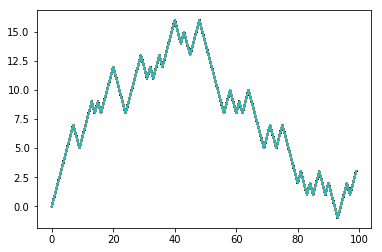

In [150]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1    # 记住这种 if-else语句的用法
    position += step
    walk.append(position)

    plt.plot(walk[:100])

__walk__ is simply the cumulative sum of the random steps and could be evaluaed as an array expression. Thus, I use the np.random module to draw 1000 coin flips at once, set these to 1 and -1, and compue the cumulative sum:

In [151]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)    # randint: [low, high)    thus, 0 or 1
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk.min()

-9

In [152]:
walk.max()

60

A more complicated statistic is the first crossing time, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction. np

In [153]:
(np.abs(walk) >= 10).argmax() # argmax return the first index of the maximum value.

297

### Simulating Many Random Walks at Once
If we want to simulate 5000 of random walks. You can generate all of the random walks with minor modifications to the preceding code:

In [154]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)    #calculate sum along rows
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]])

Now we can compute the maximum and minimum values obtained over all of the walks:

In [155]:
walks.max()

122

In [156]:
walks.min()

-128

Out of the walks, let's compute the minimum crossing time to 30 or -30. This is slightly tricky since not all 5000 of the reach 30:

In [157]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [158]:
hits30.sum()

3368

We can use this boolean array to select out the rows of walks that actually cross the absolute 30 level and call argmax across axis 1 to get the crossing times:

In [159]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

509.99762470308787

# Getting Started with pandas
pandas contanis data structures and data manipulation tools designed to make data cleaning and analysis fast and easy in Python. pandas is often used in tandem with numerical computing tools like NumPy and SciPy, analytical libraries like statsmodels and scikit-learn, and data visualization libraries like matplotlib. pandas adopts significant parts of NumPy's idiomatic style of array-based computing, especially array-based functions and a preference for data processing without for loops.

The biggest difference is that pandas is designed for working with __tabular__ or __heterogeneous__ data. NumPy, by contrast, is best suited for working with __homogeneous numerical__ array data.

Use the following convention for importing pandas:

In [15]:
import pandas as pd

It is convenient to also import Series and DataFrame into the local namespace since they are so frequently used:

In [16]:
from pandas import Series, DataFrame

## Introduction to pandas Data Structures
pandas's two most commonly used data structures:
 * Series
 * DataFrame

They provide a solid, easy-to-use basis for most applications.
### Series
A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its _index_. The simplest Series is formed only an array of data:

In [17]:
obj = pd.Series([4, 2, 3, -8, 'e'])
obj

0     4
1     2
2     3
3    -8
4     e
dtype: object

In [18]:
obj.index = ['d', 'b', 'a', 'c', 'e']    # add index after the creation of the series.
obj

d     4
b     2
a     3
c    -8
e     e
dtype: object

The indices are on the left and the values on the right. A default index consisting integers 0 to N-1 will be created if we didn't specify one.

You can get the array representation and index object of the Series via its values and index attributes, respectively:

In [19]:
obj.values

array([4, 2, 3, -8, 'e'], dtype=object)

In [20]:
obj.index

Index(['d', 'b', 'a', 'c', 'e'], dtype='object')

In [21]:
obj[obj > 0]    # obj 含有string 所以不可以这样运行。

TypeError: '>' not supported between instances of 'str' and 'int'

Often it will be desirable to create a Series with an index identifying each data point with a label:

In [22]:
another_Series = pd.Series([4, 2, 3, -8], index=['d', 'b', 'a', 'c'])
another_Series

d    4
b    2
a    3
c   -8
dtype: int64

In [23]:
another_Series.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [24]:
another_Series.values

array([ 4,  2,  3, -8])

Indices can be used to select a single value or a set of values from a Series

In [25]:
another_Series['a']

3

In [26]:
another_Series[['a', 'b', 'c']]

a    3
b    2
c   -8
dtype: int64

Here, ['a', 'b', 'c'] is considered a list of indices.

Using NumPy functions or NumPy-like operations, such as filtering with a boolean array, scalar multiplication, or applying math functions, will preserve the index-value link:

In [27]:
another_Series[another_Series > 0]

d    4
b    2
a    3
dtype: int64

In [28]:
another_Series * 2

d     8
b     4
a     6
c   -16
dtype: int64

In [29]:
np.exp(another_Series)    # e**(another_Series)

d    54.598150
b     7.389056
a    20.085537
c     0.000335
dtype: float64

Another way to think about a Series is a __fix-length__, __ordered__ dict, as it is a mapping of index values to data values. It can be used in many contexts where you might use a dict:

In [30]:
'b' in another_Series

True

In [31]:
'e' in another_Series

False

Should you have data contained in a Python dict, you can create a Series from it by passing the dict:

In [32]:
sdata = {'Ohio': 95000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
series3 = pd.Series(sdata)
series3

Ohio      95000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

When you are only passing a dict, the index in the resulting Series will have the dict's keys in sorted order. You can __override__ this by passing the dict keys in the order you want them to appear in the resulting Series:

In [33]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
series4 = pd.Series(sdata, index= states)
series4

California        NaN
Ohio          95000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Pay attention to the above, three values found in _sdata_ were placed in the appropriate locations, but since no value for 'California' was found, it appears as NaN (not a number), which is considered in pandas to mark missing or NA values. Since 'Utah' was not included in _states_, it is excluded from the resulting object.

'misssing' or 'NA' are interchangeably used here to refer missing data. The __isnull__ and __notnull__ functions in pandas should be used to detect missing data:

In [34]:
pd.isnull(series4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [35]:
pd.notnull(series4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [36]:
sum(pd.notnull(series4))

3

Series also has these as instance method:

In [37]:
series4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [38]:
series4.notnull()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

A useful Series feature for many applications is that it automatically aligns by index label in arithmetic operations:

In [39]:
series3

Ohio      95000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [40]:
series4

California        NaN
Ohio          95000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [41]:
series3 + series4   # values from the same index are added together, and ordered by index ASC

California         NaN
Ohio          190000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Both the Series object itself and its index have a __name__ attribute, which integrates with other key areas of pandas functionality.

In [42]:
series3.name = 'population'
series3.index.name = 'state'

In [43]:
series3

state
Ohio      95000
Texas     71000
Oregon    16000
Utah       5000
Name: population, dtype: int64

A Series's index can be altered in-place by assignment:

In [44]:
obj = pd.Series([4, 3, 3, -8], index=['d', 'b', 'a', 'c'])

In [45]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    3
Jeff     3
Ryan    -8
dtype: int64

### DataFrame

A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a __row__ and __column__ index; it can be thought of as a dict of Series all sharing the same index. (dict的key是column index； Series的key是row index。相当于把dict转置后做成一个DataFrame。)

Under the hood, the data is stored as one or more __two-dimentional blocks__ rather than a list, dict, or some other colliction of one-dimentional arrays.

The most common way to construct a DataFrame is from a dict of equal-length lists or NumPy arrays:

In [46]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
       'year': [2000, 2001, 2002, 2001, 2002, 2003],
       'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


For large DataFrames, the __head__ method selects only the first five rows:

In [47]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


If you specify a sequence of columns, the DataFrame's columns will be arranged in that order:

In [48]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


If you pass a column that isn't contained in the dict, it will appear with missing values in the results:

In [49]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'])
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


Index can be manually created:

In [50]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four', 'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


DataFrame has the conventional methods to view the column's names:

In [51]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

A column in a DataFrame can be retrived as a Series either by __dict-like__ notation or by __attribute__:

In [52]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [53]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

_frame2[column]_ works for any column name, but _frame2.column_ only works when the column name is a valid Python variable name. (此处不理解valid python variable name的valid是啥意思。)

Note that the returned Series have the same idnex as the DataFrame, and their name attribute has been appropriately set.

Rows can also be retrieved by position or name with the special __loc__ attribute:

In [54]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

Columns can be modified by assignment:

In [55]:
frame2.debt = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [56]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


When assigning __lists__ or __arrays__ to a column, the value's length must match the length of the DataFrame. If assigning a __Series__, its labels will be realigned exactly to the DataFrame's index, inserting missing values in any holes:

In [57]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Assigning a column that doesn't exist will create a new column. The __del__ keyword will delete columns as with a dict.

First add a new column of boolean values where the _state_ column equals 'Ohio', __frame2.column__ couldn't be used when creating a new column:

In [58]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


The __del__ method can then be used to remove this column:

In [59]:
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


The column returned from indexing a DataFrame is a _view_ on the underlying data, not a copy. Thus, __any in-place modifications to the Series will be reflected in the DataFrame__. The column can be explicitly copied with the Series's _copy_ method.

Another common form of data is a nested dict of dicts:

In [60]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
pop

{'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

If this nested dict is passed to the DataFrame, pandas will interpret the outer dict keys as the columns and the inner keys as the row indices:

In [61]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


DataFrame can be transposed with similar syntax to a NumPy array:

In [62]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


The keys in the inner dicts are combined and sorted to form the index in the result. This isn't true if an explicit index is specified:

In [63]:
pd.DataFrame(pop, index=[2001, 2002, 2003])    #书上原文命令，执行出错，可能是新版Python语法有改动

AttributeError: 'list' object has no attribute 'astype'

Dicts of Series are treated in much the same way:

In [64]:
pdata = {'Ohio': frame3['Ohio'][:-1],
        'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


If a DataFrame's _index_ and _columns_ have their _name_ attributes set, these will also be displayed:

In [65]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


As with Series, the _values_ attribute returns the data contained in the DataFrame as a two-dimensional ndarray:

In [66]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

If the DataFrame's columns are different dtypes, the dtype of the values array will be chosen to accommodata all of the columns:

In [67]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

Possible data inputs to DataFrame constructor
Type | Notes
----- | -----
2D ndarray | A matrix of data, passing optional row and column labels
dict of arrays, lists, or tuples | Each sequence becomes a column in th DataFrame; all sequences must be the same length
NumPy structured / record array | Treated as the "dict of arrays" case
dict of Series | Each value(Series) becomes a column; indexes from each Series are unioned together to form the result's row index if no explicit index is passed
dict of dicts | Each inner dict becomes a column; keys are unioned to form the row index as in the "dict of Series" case
List of dicts or Series | Each item becomes a row in the DataFrame; union of dict keys or Series indexes become the DataFrame's column labels
List of lists or tuples | Treated as the "2D ndarray" case
Another DataFrame | The DataFrame's indexes are used unless different ones are passed
NumPy MaskedArray | Like the "2D ndarray" case except masked values become NA/missing in the DataFrame result

### Index Objects
pandas's Index objects are responsible for holding the axis labels and other metadata (like the axis name or names). Any array or other sequence of labels you use when constructing a Series or DataFrame is internally converted to an Index:

In [68]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [69]:
index[1:]

Index(['b', 'c'], dtype='object')

Index objects are __immutable__ and thus can't be modified by the user:

In [70]:
index[1] = 'd'

TypeError: Index does not support mutable operations

Immutability makes it safer to share Index objects among data structures:

In [71]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [72]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [73]:
obj2.index is labels

True

In addition to being array-like, an Index also behaves like a fixed-size set:

In [74]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [75]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [76]:
'Ohio' in frame3.columns

True

In [77]:
2003 in frame3.columns

False

Unlike Python sets, a pandas Index can contain duplicate labels:

In [78]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

Selections with duplicate labels will select all occurrences of that label.

Each Index has a number of methods and properties for set logic, which answer other common questions about the data it contains. Some useful ones are summarized here:

Some Index methods and properties
Method | Description
----- | -----
append | Concatenate with additional Index objects, producing a new Index
difference | Compute set difference as an Index
intersection | Compute set intersection
union | Compute set union
isin | Compute boolean array indicating whether each value is contained in the passed collection
delete | Compute new Index with element at index i deleted
drop | Compute new Index by deleting passed values
insert | Compute new Index by inserting element at index i
is_monotonic | Returns True if each element is greater than or equal to the previous element
is_unique | Returns True if the Index has no duplicate values
unique | Compute the array of unique values in the Index

## Essential Functionality
### Reindexing  按指定顺序重新排序
It is an important method on pandas objects, which means to create a new object with the data _conformed_ to a new index. Consider an example:

In [79]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [80]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])    # reorder the values by the new index
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

For ordered data like time series, it may be desirable to do some interpolation or filling of values when reindexing. The _method_ option allows us to do this, using a method such as _ffill_, which __forward-fills__ the values:

In [81]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [82]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

With DataFrame, _reindex_ can alter either the (row) index, columns, or both. When passed only a sequence, it reindexes the rows in teh result:

In [83]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                    index=['a', 'c', 'd'],
                    columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [84]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])    # reindex works on row index on default
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


The columns can be reindexed with the columns keyword:

In [85]:
states = ['Texas', 'Utah', 'California']    # for columns it has to be explicitly
frame.reindex(columns = states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


We can reindex more succinctly by label-indexing with __loc__, and many users prefer to use it exclusively:

In [86]:
frame.loc[['a', 'b', 'c', 'd'], states]

/Users/jianbinliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


reindex function arguments
Argument | Description
----- | -----
index | New sequence to use as index. Can be Index instance or any other sequence-like Python data structure. An Index will be used exactly as is without any copying.
method | Interpolation (fill) method; 'ffill' fills forward, while 'bfill' fills backward.
fill_value | Substitute value to use when introducing missing data by reindexing.
limit | When forward- or backfilling, maximum size gap (in number of elements) to fill.
tolerance | When forward- or backfilling, maximum size gap (in absolute numeric distance) to fill for inexact matches.
level | Match simple Index on level of MultiIndex; otherwise select subset of.
copy | If True, always copy underlying data even if new index is equivalent to old index; if False, do not copy the data when the indexes are equivalent.

### Dropping Entries from an Axis
The _drop_ method will return a new object with the indicated value or values deleted from an axis:

In [87]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [88]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [89]:
obj.drop(['b', 'c'])

a    0.0
d    3.0
e    4.0
dtype: float64

In [90]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

With DataFrame, index values can be deleted from either axis:

In [91]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                   index=['Ohio', 'Colorado', 'Utah', 'New York'],
                   columns= ['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Calling _drop_ with a sequence of labels will drop values from the row labels (axis 0):

In [92]:
data.drop(['Ohio', 'Colorado'])    # DOES NOT actually modify the original data!!!!

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


Can drop values from the columns by passing _axis=1_ or _axis='columns':

In [93]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


Many functions, like _drop_ which modify the size or shape of a Series or DataFrame, can manipulate an object _in-place_ without returning a new object:

In [94]:
obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

### Indexing, Selection, and Filtering

Series indexing works analogously to NumPy array indexing, except you can use the Series's index values instead of only integers:

In [95]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [96]:
obj['b']

1.0

In [97]:
obj[1]

1.0

In [98]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [99]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [100]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [101]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

Slicing with labels behaves differently than normal Python slicing in that the end-point is __inclusive__:

In [102]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

using this methods modifies the corresponding section of the Series:

In [103]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

Indexing into a DataFrame is for retrieving one or more __columns__ either with a single value or sequence: (CAREFUL, rows doesnot work this way)

In [104]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                   index=['Ohio', 'Colorado', 'Utah', 'New York'],
                   columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [105]:
data['one']

Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int64

In [106]:
data['Ohio']    # DOES NOT work this way, CAN'T select row by row index

KeyError: 'Ohio'

In [107]:
data[['two', 'one']]

,two,one
Ohio,1,0
Colorado,5,4
Utah,9,8
New York,13,12


Indexing like this has a few special cases. First, slicing or selecting data with a boolean array:

In [108]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [109]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


The __row selection syntax__ data[:2] is provided as a convenience. Passing a single element or a list to the [] operator selects columns.

Another use case is in indexing with a boolean DataFrame, such as one produced by a scalar comparison:

In [110]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [111]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


This makes DataFrame syntactically more like a two-dimensional NumPy array in this particular case.

### Selection with loc and iloc
Sepecial indexing operators _loc_ and _iloc_ are for DataFrame label-indexing on the rows. They enable you to select a subset of the rows and columns from a DataFrame with NumPy-like notation using either axis labels (_loc_) or integers (_iloc_).

Select a single row and multiple columns:

In [112]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [113]:
data.loc[:'Utah']

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11


In [114]:
data.loc['Utah', 'two']

9

Similar selections with _iloc_:

In [115]:
data.iloc[2, [3, 0, 1]]    #  Rows can be selected using iloc or loc

four    11
one      8
two      9
Name: Utah, dtype: int64

In [116]:
data.iloc[2]    

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

Additional selection can be added like this:

In [117]:
data.iloc[:, :3][data.three > 3]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


Indexing options with DataFrame
Type | Notes
----- | -----
df[val] | Select single column or sequence of columns from the DataFrame; special case conveniences: boolean array (filter rows), slice (slice rows), or boolean DataFrame (set values based on some criterion).
df.loc[val] | Selects single row or subset of rows from the DataFrame by label
df.loc[:, val] | Selects single column or subset of columns by label
df.loc[val1, val2] | Select both rows and columns by label
df.iloc[where] | Selects single row or subset of rows from the DataFrame by integer position
df.iloc[:, where] | Selects single column or subset of columns by integer position
df.iloc[where_i, where_j] | Select both rows and columns by integer position
df.at[label_i, label_j] | Select a single scalar value by row and column label
df.iat[i, j] | Select a single scalar value by row and column position (integers)
reindex method | Select either rows or columns by labels
get_value, set_value methods | Select single value by row and column label

### Integer Indexes
For more precise handling, use _loc_ (for labels) or _iloc_ (for integers):

In [118]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [119]:
ser[:1]

0    0.0
dtype: float64

In [120]:
ser.loc[:1]    # loc for labels indices are both inclusive

0    0.0
1    1.0
dtype: float64

In [121]:
ser.iloc[:1]

0    0.0
dtype: float64

### Arithmetic and Data Alignment

An important pandas feature for some applications is the behavior of arithmetic between objects with different indexes. When you are adding together objects, if any index pairs are not the same, the respective index in the result will be the union of the index pairs. This is similar to an automatic outer join on the index label:

In [122]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [123]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [124]:
s1 和 s2 中同时存在才可正常相加，如d f g 只在s1 s2之一中存在，则运算结果为NaN，不存在。

SyntaxError: invalid syntax (<ipython-input-124-4583c8d4e536>, line 1)

In [125]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In the case of DataFrame, alignment is performed on both the rows and the columns:

In [126]:
df1 = pd.DataFrame(np.arange(9).reshape((3, 3)), columns=list('bcd'), index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0,1,2
Texas,3,4,5
Colorado,6,7,8


In [127]:
df2

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


Adding these together returns a DataFrame whose index and columns are the unions of the ones in each DataFrame:

In [128]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


Since the 'c' and 'e' columns are not found in both DataFrame objects, they appear as all missing in the result. The same holds for the rows whose labels are not common to both objects.

### Arithmetic methods with fill values
In arithmetic operations between differently indexed objects, you might want to fill with a special value, like 0, when an axis label is found in one object but not the other (如果想避免以上这样相加出现NaN的情况，需要给缺失的值设置默认值):

In [129]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [130]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


Adding these together results in NA values in the locations that don't overlap:

In [131]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


Using the _add_ method on df1, I pass df2 and an argument to _fill_value_:

In [132]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


Table: Series and DataFrame methods for arithmetic.  

Method | Description
----- | -----
add, radd | Methods for addtion (+)
sub, rsub | Methods for subtraction (-)
div, rdiv | Methods for division (/)
floordiv, rfloordiv | Methods for floor division (//)
mul, rmul | Methods for multiplication (\*)
pow, rpow | Methods for exponentiation (\**)

Each of the method has a conterpart, starting with the letter r, that has arguments flipped. For example, the following two statements are equivalent:

In [133]:
1 / df1  

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250000,0.200000,0.166667,0.142857
2,0.125000,0.111111,0.100000,0.090909


In [134]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250000,0.200000,0.166667,0.142857
2,0.125000,0.111111,0.100000,0.090909


Relatedly, when reindexing a Series or DataFrame, you can also specify a different fill value:

In [135]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### Operations between DataFrame and Series

Arithmetic between DataFrame and Series is defined just like NumPy arrasy:

In [136]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [137]:
arr[0]

array([0., 1., 2., 3.])

In [138]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

the above subtraction is performed once for each row. This is called _broadcasting_. Operations between a DataFrame and a Series are similar:

In [139]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [140]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

By default, arithmetic between DataFrame and Sereis matches the index of the Series on the DataFrame's columns, broadcasting down the rows:

In [141]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


If an index value is not found in either the DataFrame's columns or the Series's index, the objects will be reindexed to form the union:

In [142]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


If you want to instead broadcast over the columns, matching on the rows, you havee to use one of the __arithmetic methods__:

In [143]:
series3 = frame['d']
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [144]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [145]:
frame.sub(series3, axis='index')    # or axis=0

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### Function Application and Mapping
NumPy ufunctions (element-wise array methods) also work with pandas objects:

In [146]:
frame = pd.DataFrame(np.random.randn(4,3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-1.426726,0.892947,-1.553469
Ohio,-0.363469,0.860025,0.500194
Texas,0.129445,1.137630,0.191343
Oregon,-0.106504,-0.991472,-0.418255


In [147]:
np.abs(frame)

,b,d,e
Utah,1.426726,0.892947,1.553469
Ohio,0.363469,0.860025,0.500194
Texas,0.129445,1.137630,0.191343
Oregon,0.106504,0.991472,0.418255


Another frequent operation is applying a function on one-dimentional arrays to each column or row. DataFrame's _apply_ method does this:

In [148]:
f = lambda x: x.max() - x.min()
frame.apply(f) # 此处默认对列做计算

b    1.556171
d    2.129102
e    2.053663
dtype: float64

In [149]:
frame.apply(f, axis=1)   # or axis='columns'

Utah      2.446416
Ohio      1.223494
Texas     1.008185
Oregon    0.884969
dtype: float64

Many of the common array statistics are DataFrame methods, so using _apply_ is not necessary.

The function passed to _apply_ can also return a Series with multiple values:

In [150]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-1.426726,-0.991472,-1.553469
max,0.129445,1.137630,0.500194


Element-wise Python functions can be used, too. Suppose you wanted to compute a formatted string from each floating-point value in _frame_. You can do this with _apply_ method:

In [151]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-1.43,0.89,-1.55
Ohio,-0.36,0.86,0.50
Texas,0.13,1.14,0.19
Oregon,-0.11,-0.99,-0.42


The reason for the name _applymap_ is that Sereis has a _map_ method for applying an element-wise function:

In [152]:
frame['e'].map(format)

Utah      -1.55
Ohio       0.50
Texas      0.19
Oregon    -0.42
Name: e, dtype: object

### Sorting and Ranking
To sort by row or column index, use the _sort_index_ method, which returns a new, sorted object, which return a new, sorted object:

In [153]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

With a DataFrame, you can sort by index on either axis:

In [154]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'], columns=['d', 'a', 'b', 'c'])
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [155]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


Data is sorted in ascending order by default, but can be sorted in descending order, too:

In [156]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


To sort a Series by its value, use its _sort_values_ method:

In [157]:
obj = pd.Series([4, 7, 3, -2])
obj.sort_values()

3   -2
2    3
0    4
1    7
dtype: int64

Any missing values are sorted to the end by default:

In [159]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

When sorting a DataFrame, you can use the data in one or more columns as the sort keys. To do so, pass one or more column names to the __by__ option of sort\_values:

In [160]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [161]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


To sort by multiple columns, pass a list of names:

In [162]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1
